In [19]:
%matplotlib notebook

# The Driven Damped Pendulum

We set up the differential equation with driving period=1, relatively weak damping, and a natural period (for the linearized pendulum) that is 2/3 that of the driving period. 

In [20]:


import numpy as np
import scipy.integrate as spi


def equation(t, phi, gamma, omega):
    phi_1 = phi[0]
    phi_2 = phi[1]
    return [phi_2, -2 * beta * phi_2 - omega_0**2 * np.sin(phi_1) + gamma * omega_0**2 * np.cos(omega * t)]

omega = 2 * np.pi
omega_0 = 1.5 * omega
beta = omega_0 / 4
gamma = 0###

# Some other parameters that will be useful later

t_max = 40
length = 1


initial_conditions = [0, 0]  # Set your initial conditions here
t_span = np.linspace(0, t_max, length)

solution = spi.solve_ivp(lambda t, y: equation(t, y, gamma, omega), [0, t_max], initial_conditions, t_eval=t_span)



<IPython.core.display.Javascript object>


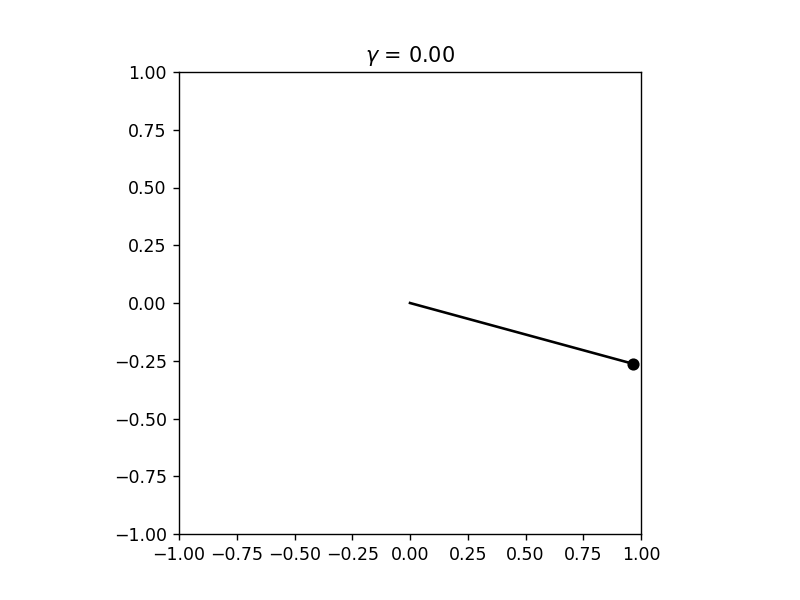

In [22]:
# A test: Solve for no driving force

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation

def equation(phi, t, gamma, omega):
    phi_1 = phi[0]
    phi_2 = phi[1]
    return [phi_2, -2 * beta * phi_2 - omega_0**2 * np.sin(phi_1) + gamma * omega_0**2 * np.cos(omega * t)]

omega = 2 * np.pi
omega_0 = 1.5 * omega
beta = omega_0 / 4

t_max = 40
length = 1

initial_conditions = [9 * np.pi / 10, 0]  # Set your initial conditions here
t_span = np.linspace(0, t_max, 1000)

gamma = 0
solution = odeint(equation, initial_conditions, t_span, args=(gamma, omega))

xBob = length * np.sin(solution[:, 0])
yBob = -length * np.cos(solution[:, 0])
pBob = np.column_stack((xBob, yBob))

fig, ax = plt.subplots()
line, = ax.plot([], [], 'k')
disk, = ax.plot([], [], 'ko')

def animate(i):
    line.set_data([0, pBob[i, 0]], [0, pBob[i, 1]])
    disk.set_data(pBob[i, 0], pBob[i, 1])
    return line, disk

ax.set_xlim(-length, length)
ax.set_ylim(-length, length)
ax.set_aspect('equal')
plt.plot([0], [0], 'k', linewidth=2)  # Plotting a vertical line
plt.title("$\gamma$ = %0.2f"%gamma)

animation = FuncAnimation(fig, animate, frames=len(t_span), interval=200, blit=True)
plt.show()


<IPython.core.display.Javascript object>


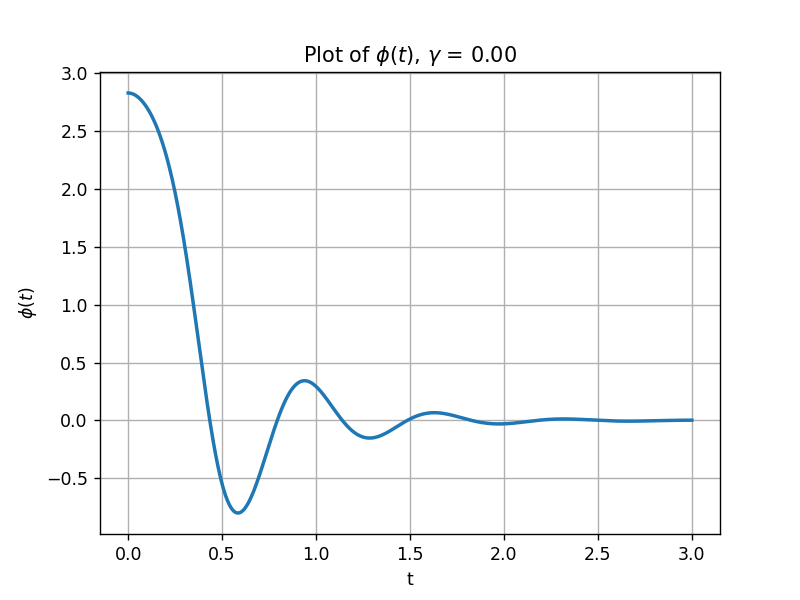

In [23]:
# Cartoons are fun, but plots are more accurate



### Define the equation function and parameters (beta, omega_0, omega) here

t_max = 3

t_span = np.linspace(0, t_max, 1000)

phi_values = odeint(equation, initial_conditions, t_span, args=(gamma, omega))

plt.plot(t_span, phi_values[:, 0], linewidth=2)
plt.xlabel('t')
plt.ylabel('$\phi(t)$')
plt.title('Plot of $\phi(t)$, $\gamma$ = %0.2f'%gamma)
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>


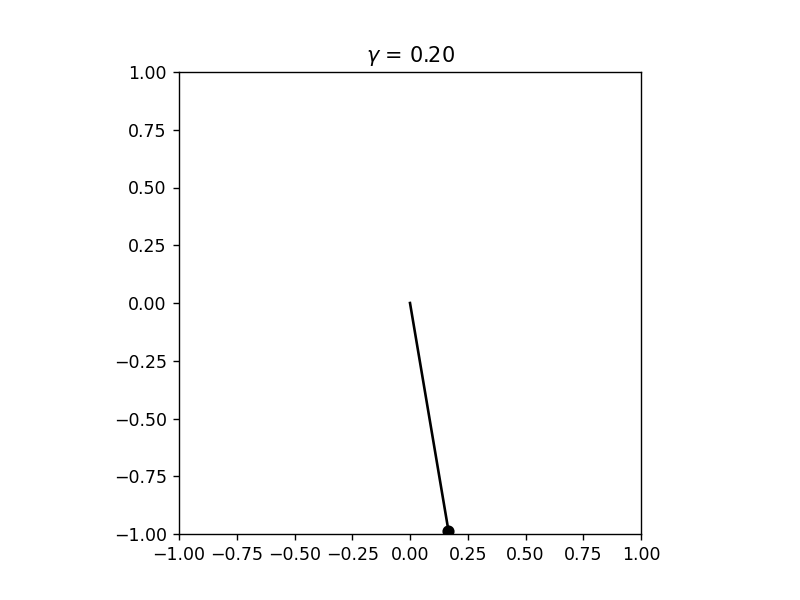

In [24]:
# Now drive it with a weak amplitude (F0/mg=0.2)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation

def equation(phi, t, gamma, omega):
    phi_1 = phi[0]
    phi_2 = phi[1]
    return [phi_2, -2 * beta * phi_2 - omega_0**2 * np.sin(phi_1) + gamma * omega_0**2 * np.cos(omega * t)]

omega = 2 * np.pi
omega_0 = 1.5 * omega
beta = omega_0 / 4

t_max = 40
length = 1

initial_conditions = [0, 0]  # Set your initial conditions here
t_span = np.linspace(0, t_max, 1000)

gamma = 0.2
solution = odeint(equation, initial_conditions, t_span, args=(gamma, omega))

xBob = length * np.sin(solution[:, 0])
yBob = -length * np.cos(solution[:, 0])
pBob = np.column_stack((xBob, yBob))

fig, ax = plt.subplots()
line, = ax.plot([], [], 'k')
disk, = ax.plot([], [], 'ko')

def animate(i):
    line.set_data([0, pBob[i, 0]], [0, pBob[i, 1]])
    disk.set_data(pBob[i, 0], pBob[i, 1])
    return line, disk

ax.set_xlim(-length, length)
ax.set_ylim(-length, length)
ax.set_aspect('equal')
plt.plot([0], [0], 'k', linewidth=2)  # Plotting a vertical line

plt.title("$\gamma$ = %0.2f"%gamma)
animation = FuncAnimation(fig, animate, frames=len(t_span), interval=200, blit=True)
plt.show()



<IPython.core.display.Javascript object>


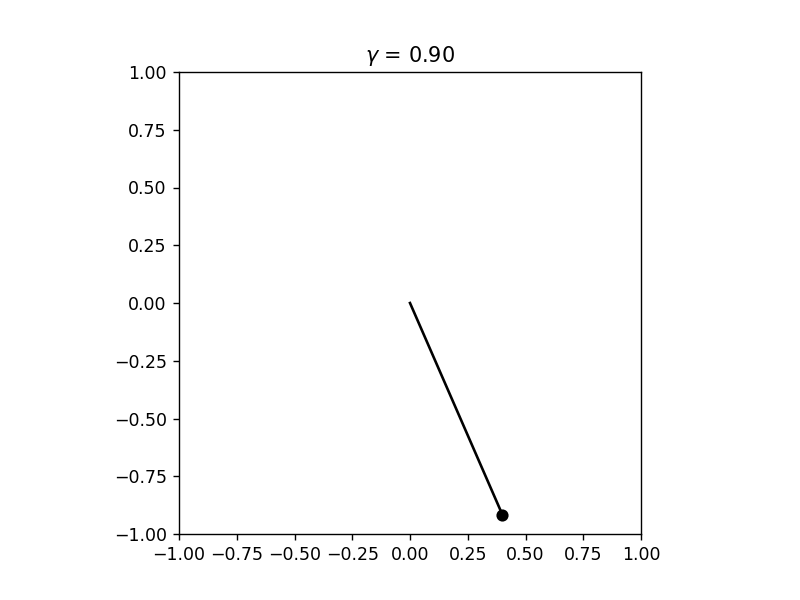

In [25]:
# Now a larger amplitude (F0/mg=0.9)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation

def equation(phi, t, gamma, omega):
    phi_1 = phi[0]
    phi_2 = phi[1]
    return [phi_2, -2 * beta * phi_2 - omega_0**2 * np.sin(phi_1) + gamma * omega_0**2 * np.cos(omega * t)]

beta = omega_0 / 4
omega_0 = 1.5 * omega
omega = 2 * np.pi

t_max = 40
length = 1

initial_conditions = [0, 0]  # Set your initial conditions here
t_span = np.linspace(0, t_max, 1000)

gamma = 0.9
solution = odeint(equation, initial_conditions, t_span, args=(gamma, omega))

xBob = length * np.sin(solution[:, 0])
yBob = -length * np.cos(solution[:, 0])
pBob = np.column_stack((xBob, yBob))

fig, ax = plt.subplots()
line, = ax.plot([], [], 'k')
disk, = ax.plot([], [], 'ko')

def animate(i):
    line.set_data([0, pBob[i, 0]], [0, pBob[i, 1]])
    disk.set_data(pBob[i, 0], pBob[i, 1])
    return line, disk

ax.set_xlim(-length, length)
ax.set_ylim(-length, length)
ax.set_aspect('equal')
plt.plot([0], [0], 'k', linewidth=2)  # Plotting a vertical line
plt.title("$\gamma$ = %0.2f"%gamma)

animation = FuncAnimation(fig, animate, frames=len(t_span), interval=200, blit=True)
plt.show()


<IPython.core.display.Javascript object>


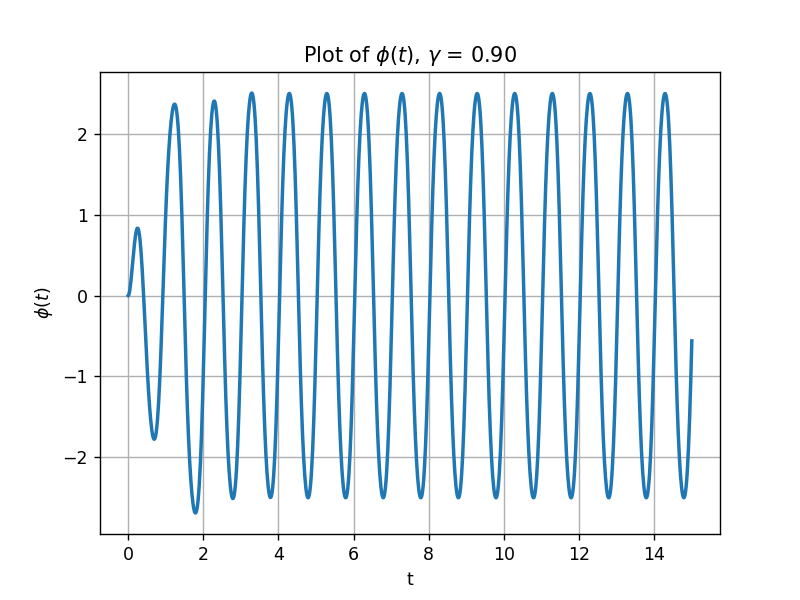

In [26]:
# Let's plot this one and compare to the motion we saw

# Define the equation function and parameters (beta, omega_0, omega) here

t_max = 15

t_span = np.linspace(0, t_max, 1000)

phi_values = odeint(equation, initial_conditions, t_span, args=(gamma, omega))

fig,ax = plt.subplots()
plt.plot(t_span, phi_values[:, 0], linewidth=2)
plt.xlabel('t')
plt.ylabel('$\phi(t)$')
plt.title('Plot of $\phi(t)$, $\gamma$ = %0.2f'%gamma)
plt.grid(True)
plt.show()


In [32]:
# Confirm that the motion at long times is periodic

# Define the equation function and parameters (beta, omega_0, omega) here

t_max = 40

t_values = np.array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

phi_values = odeint(equation, initial_conditions, t_values, args=(gamma, omega))

phi_t = phi_values[:, 0]

print(phi_t)


[ 0.          0.20232318  7.11826335 13.80231323  8.04706447  6.13510585
  6.17802197  5.57604579  6.17291323  5.73499448]


In [33]:
### 8 ###

<IPython.core.display.Javascript object>


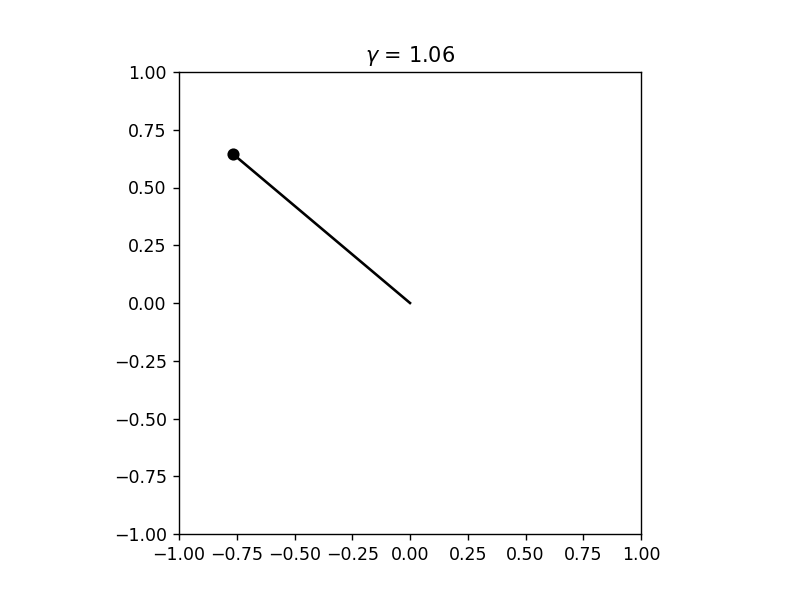

In [34]:
# Now, try with gamma = F0/mg=1.06 > 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation

def equation(phi, t, gamma, omega):
    phi_1 = phi[0]
    phi_2 = phi[1]
    return [phi_2, -2 * beta * phi_2 - omega_0**2 * np.sin(phi_1) + gamma * omega_0**2 * np.cos(omega * t)]

beta = omega_0 / 4
omega_0 = 1.5 * omega
omega = 2 * np.pi

t_max = 40
length = 1

initial_conditions = [0, 0]  # Set your initial conditions here
t_span = np.linspace(0, t_max, 1000)

gamma = 1.06
solution = odeint(equation, initial_conditions, t_span, args=(gamma, omega))

xBob = length * np.sin(solution[:, 0])
yBob = -length * np.cos(solution[:, 0])
pBob = np.column_stack((xBob, yBob))

fig, ax = plt.subplots()
line, = ax.plot([], [], 'k')
disk, = ax.plot([], [], 'ko')

def animate(i):
    line.set_data([0, pBob[i, 0]], [0, pBob[i, 1]])
    disk.set_data(pBob[i, 0], pBob[i, 1])
    return line, disk

ax.set_xlim(-length, length)
ax.set_ylim(-length, length)
ax.set_aspect('equal')
plt.plot([0], [0], 'k', linewidth=2)  # Plotting a vertical line
plt.title("$\gamma$ = %0.2f"%gamma)

animation = FuncAnimation(fig, animate, frames=len(t_span), interval=200, blit=True)
plt.show()


In [37]:
# # Crazy motion, but it still has period=1

# # Define the equation function and parameters (beta, omega_0, omega) here

# # For evaluating phi(t) at specific time points, you can use the following code:
# t_values = np.array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

# phi_t = np.interp(t_values, t_span, phi_values[:, 0])

# print(phi_t)

<IPython.core.display.Javascript object>


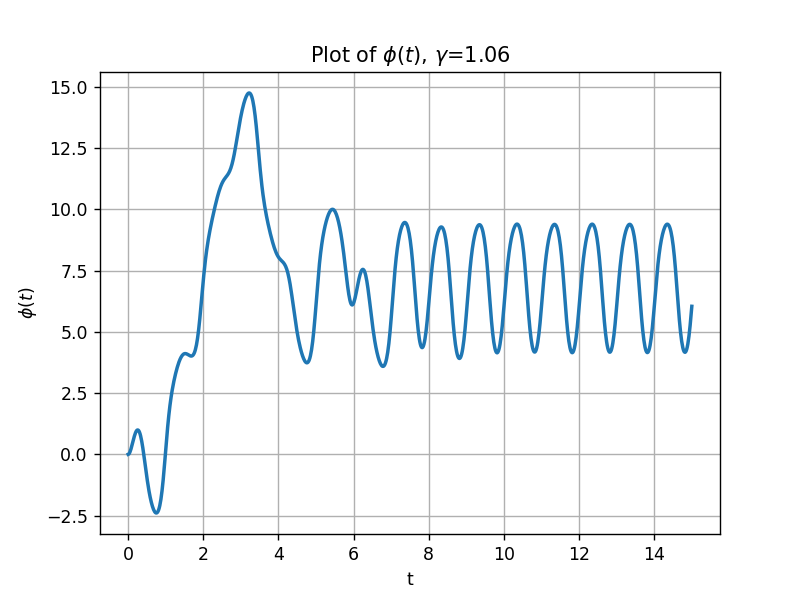

In [40]:

t_max = 15

t_span = np.linspace(0, t_max, 1000)

phi_values = odeint(equation, initial_conditions, t_span, args=(gamma, omega))

fig,ax = plt.subplots()
plt.plot(t_span, phi_values[:, 0], linewidth=2)
plt.xlabel('t')
plt.ylabel('$\phi(t)$')
plt.title('Plot of $\phi(t)$, $\gamma$=%0.2f'%gamma)
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>


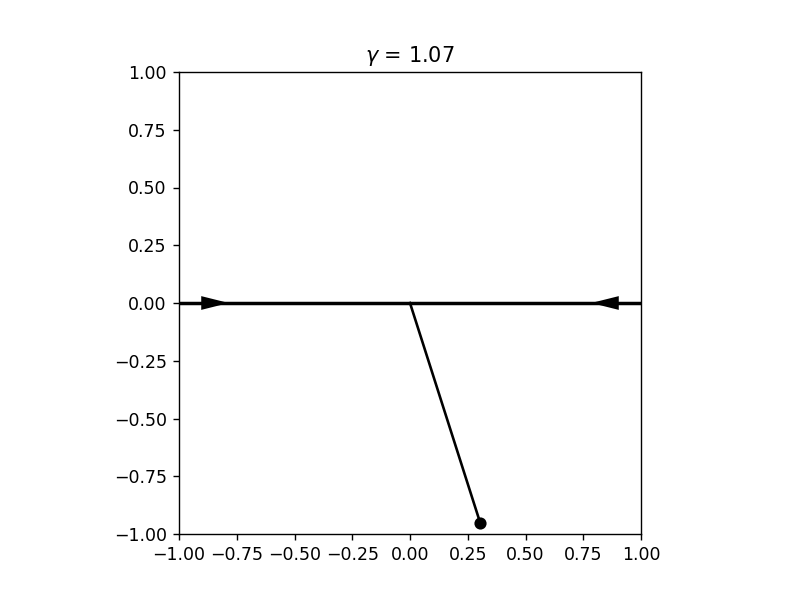

In [42]:
# Now, use gamma = F0/mg=1.073



# def equation(phi, t, gamma, omega):
#     phi_1 = phi[0]
#     phi_2 = phi[1]
#     return [phi_2, -2 * beta * phi_2 - omega_0**2 * np.sin(phi_1) + gamma * omega_0**2 * np.cos(omega * t)]

# beta = omega_0 / 4
# omega_0 = 1.5 * omega
# omega = 2 * np.pi

# t_max = 40
# length = 1

# initial_conditions = [0, 0]  # Set your initial conditions here
# t_span = np.linspace(0, t_max, 1000)

gamma = 1.073
solution = odeint(equation, initial_conditions, t_span, args=(gamma, omega))

xBob = length * np.sin(solution[:, 0])
yBob = -length * np.cos(solution[:, 0])
pBob = np.column_stack((xBob, yBob))

fig, ax = plt.subplots()
line, = ax.plot([], [], 'k')
disk, = ax.plot([], [], 'ko')

def animate(i):
    line.set_data([0, pBob[i, 0]], [0, pBob[i, 1]])
    disk.set_data(pBob[i, 0], pBob[i, 1])
    return line, disk

ax.set_xlim(-length, length)
ax.set_ylim(-length, length)
ax.set_aspect('equal')
plt.plot([-length, length], [0, 0], 'k', linewidth=2)  # Plotting a horizontal line with arrows
plt.arrow(-length, 0, 0.1, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.arrow(length, 0, -0.1, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.title("$\gamma$ = %0.2f"%gamma)

animation = FuncAnimation(fig, animate, frames=len(t_span), interval=200, blit=True)
plt.show()


[-6.40460429 -6.63536621 -6.40543028 -6.63646979 -6.40623573 -6.6375974
 -6.40699227 -6.63872748 -6.40767629 -6.63982048]


<IPython.core.display.Javascript object>


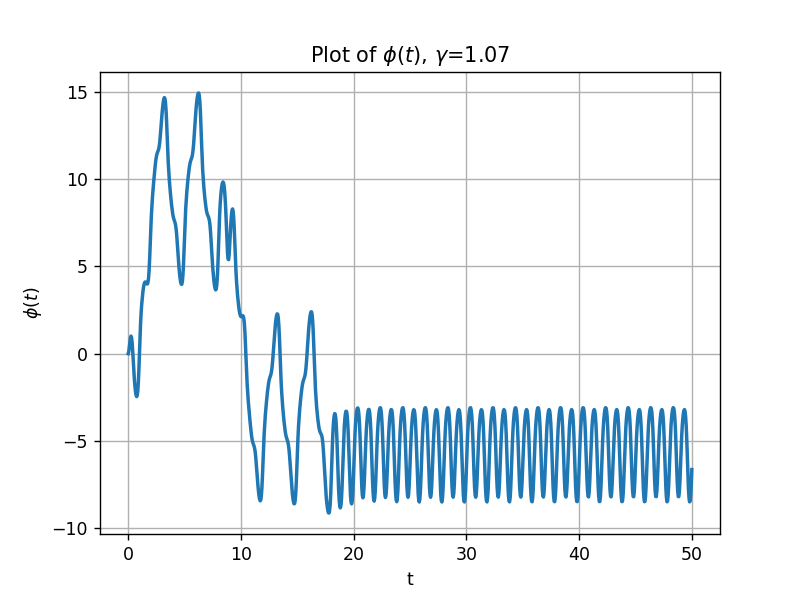

In [45]:
# This one needs a closer look

# For evaluating phi(t) at specific time points, you can use the following code:
t_values = np.array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

phi_t = np.interp(t_values, t_span, phi_values[:, 0])

print(phi_t)

# Define the equation function and parameters (beta, omega_0, omega) here

t_max = 50

t_span = np.linspace(0, t_max, 1000)

phi_values = odeint(equation, initial_conditions, t_span, args=(gamma, omega))

plt.plot(t_span, phi_values[:, 0], linewidth=2)
plt.xlabel('t')
plt.ylabel('$\phi(t)$')
plt.title('Plot of $\phi(t)$, $\gamma$=%0.2f'%gamma)
plt.grid(True)
plt.show()

# This one has period=2!

<IPython.core.display.Javascript object>


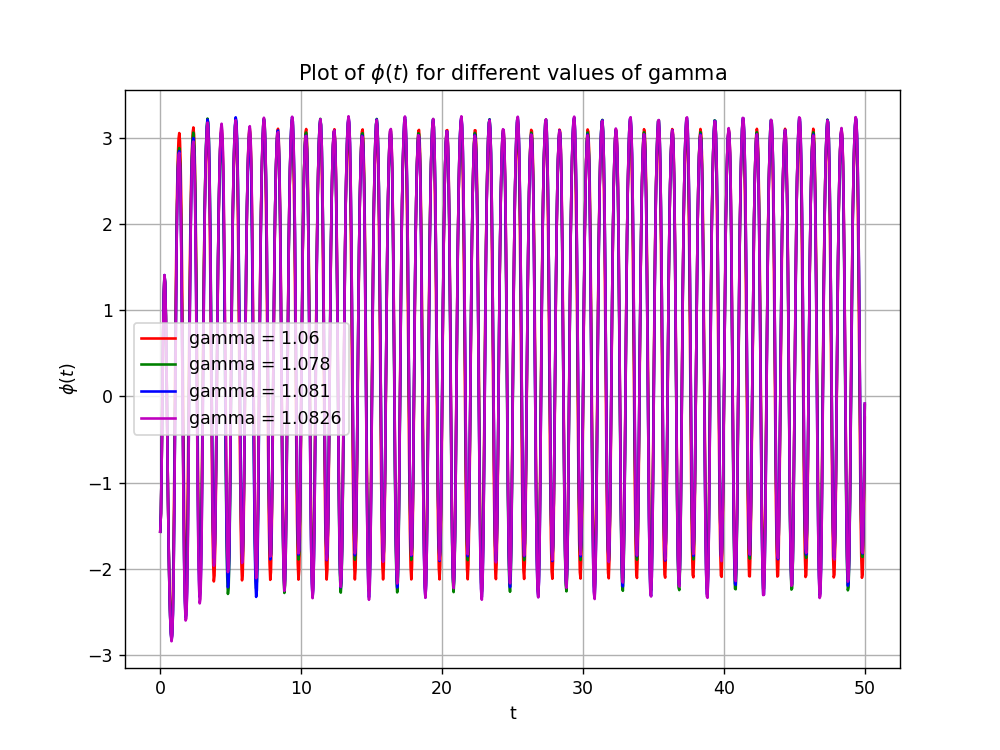

In [46]:
# A Series of Driving Strengths (and new IC's)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# def equation(phi, t, gamma, omega):
#     phi_1 = phi[0]
#     phi_2 = phi[1]
#     return [phi_2, -2 * beta * phi_2 - omega_0**2 * np.sin(phi_1) + gamma * omega_0**2 * np.cos(omega * t)]

# beta = omega_0 / 4
# omega_0 = 1.5 * omega
# omega = 2 * np.pi

# t_max = 40

initial_conditions = [-np.pi / 2, 0]  # Set your initial conditions here
t_span = np.linspace(0, t_max, 1000)

gammas = [1.06, 1.078, 1.081, 1.0826]
solutions = []

for gamma in gammas:
    solution = odeint(equation, initial_conditions, t_span, args=(gamma, omega))
    solutions.append(solution)

plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'm']
labels = [f'gamma = {gamma}' for gamma in gammas]

for i, solution in enumerate(solutions):
    plt.plot(t_span, solution[:, 0], color=colors[i], label=labels[i])

plt.xlabel('t')
plt.ylabel('$\phi(t)$')
plt.title('Plot of $\phi(t)$ for different values of gamma')
plt.legend()
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>


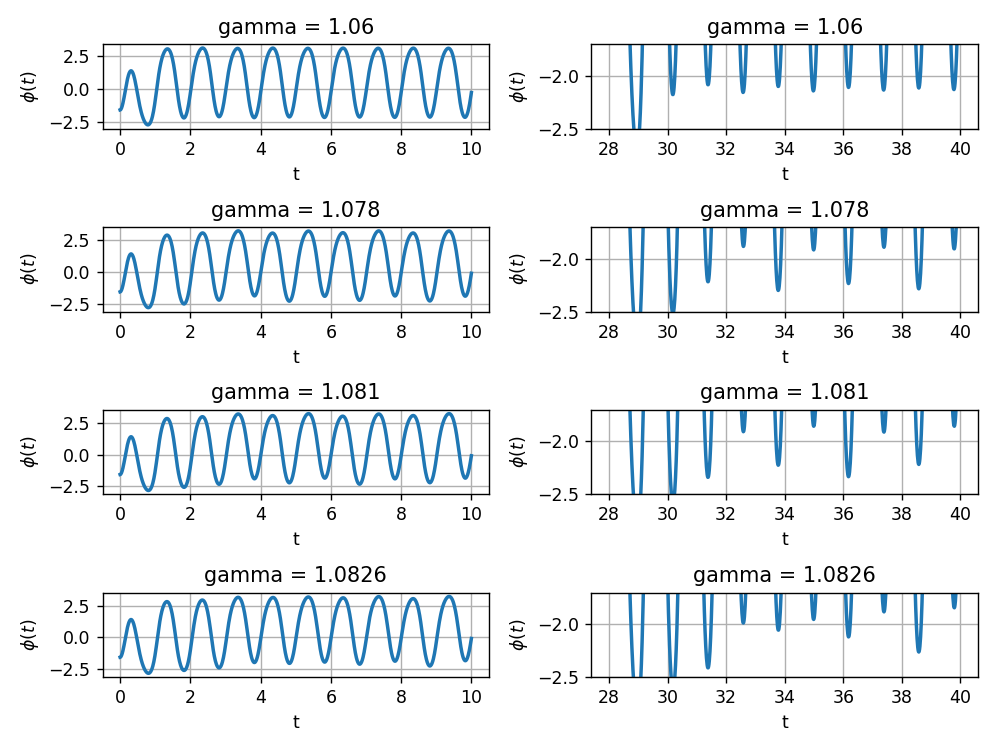

In [47]:
# Define the equation function and parameters (beta, omega_0, omega) here

t_max = 40

initial_conditions = [-np.pi / 2, 0]  # Set your initial conditions here
t_span1 = np.linspace(0, 10, 1000)
t_span2 = np.linspace(28, 40, 1000)

gammas = [1.06, 1.078, 1.081, 1.0826]
solutions = []

for gamma in gammas:
    solution = odeint(equation, initial_conditions, t_span1, args=(gamma, omega))
    solutions.append(solution)

plt.figure(figsize=(8, 6))

for i, solution in enumerate(solutions):
    plt.subplot(4, 2, 2*i+1)
    plt.plot(t_span1, solution[:, 0], linewidth=2)
    plt.title(f'gamma = {gammas[i]}')
    plt.xlabel('t')
    plt.ylabel('$\phi(t)$')
    plt.grid(True)

    plt.subplot(4, 2, 2*i+2)
    plt.plot(t_span2, solution[:, 0], linewidth=2)
    plt.title(f'gamma = {gammas[i]}')
    plt.xlabel('t')
    plt.ylabel('$\phi(t)$')
    plt.ylim(-2.5, -1.7)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [48]:
# Check to find out if the motion is still periodic
# REMEMBER THESE VALUES: We will use them later to build a "bifurcation diagram"


# Define the equation function and parameters (beta, omega_0, omega) here

t_values1 = np.array([31, 32, 33, 34, 35, 36, 37, 38])
t_values2 = np.array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

gamma_values = [1.06, 1.078, 1.081, 1.0826]
solutions = []

for gamma in gamma_values:
    solution = odeint(equation, initial_conditions, t_values1, args=(gamma, omega))
    solutions.append(solution)

for i, solution in enumerate(solutions):
    phi_t1 = solution[:, 0]
    phi_t2 = odeint(equation, solution[-1], t_values2[:-1], args=(gamma_values[i], omega))[:, 0]
    phi_values = np.concatenate((phi_t1, phi_t2))

    phi_values_rounded = np.round(phi_values, 4)
    print(phi_values_rounded)


# Yes! The period keeps doubling

[-1.5708 -0.8515 -0.2969 -0.2134 -0.2789 -0.2265 -0.2644 -0.2343 -0.2343
 -0.2568 -0.2391 -0.2526 -0.2421 -0.2501 -0.2439 -0.2487 -0.2449 -0.2478
 -0.2456 -0.2473 -0.246  -0.247  -0.2462]
[-1.5708 -1.209  -0.8162 -0.3517 -0.0965 -0.4576 -0.1112 -0.3736 -0.3736
 -0.0998 -0.4366 -0.1068 -0.3959 -0.1012 -0.4279 -0.1053 -0.4042 -0.102
 -0.4229 -0.1045 -0.4086 -0.1025 -0.4199]
[-1.5708 -1.2736 -0.9491 -0.5102 -0.1073 -0.3626 -0.0856 -0.5052 -0.5052
 -0.1092 -0.3536 -0.0856 -0.505  -0.1091 -0.354  -0.0856 -0.505  -0.1091
 -0.3539 -0.0856 -0.505  -0.1091 -0.3539]
[-1.5708 -1.3086 -1.0261 -0.6263 -0.1515 -0.2003 -0.1327 -0.2539 -0.2539
 -0.097  -0.4093 -0.0814 -0.5223 -0.1068 -0.3495 -0.0788 -0.5482 -0.1165
 -0.3054 -0.0827 -0.5133 -0.1038 -0.3652]


<IPython.core.display.Javascript object>


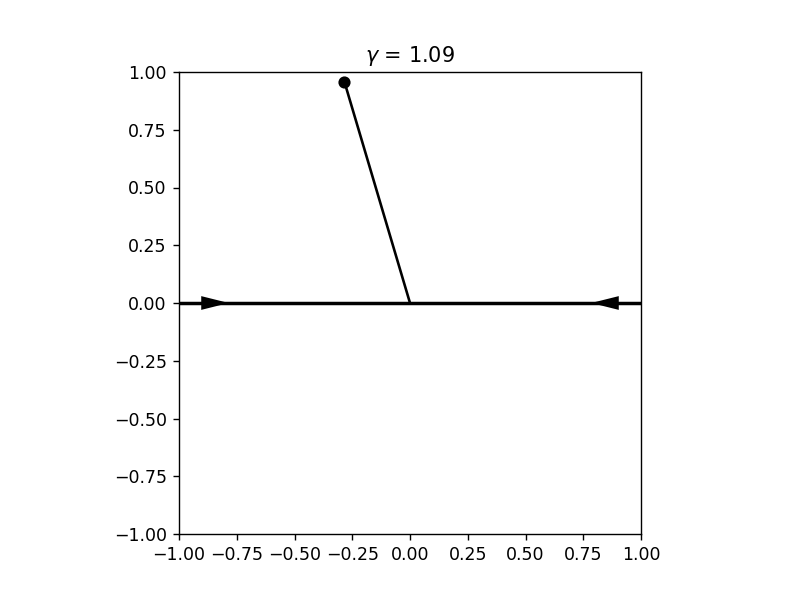

In [50]:
# One more: gamma=F0/mg=1.09


def equation(t, phi, gamma, omega):
    phi_1 = phi[0]
    phi_2 = phi[1]
    return [phi_2, -2 * beta * phi_2 - omega_0**2 * np.sin(phi_1) + gamma * omega_0**2 * np.cos(omega * t)]

omega = 2 * np.pi
omega_0 = 1.5 * omega
beta = omega_0 / 4

t_max = 40
length = 1

gamma = 1.09
initial_conditions = [-np.pi / 2, 0]  # Set your initial conditions here

solution = spi.solve_ivp(equation, [0, t_max], initial_conditions, args=(gamma, omega), dense_output=True)

t_span = np.linspace(0, t_max, 1000)
phi_values = solution.sol(t_span)

xBob = length * np.sin(phi_values[0])
yBob = -length * np.cos(phi_values[0])
pBob = np.column_stack((xBob, yBob))

fig, ax = plt.subplots()
line, = ax.plot([], [], 'k')
disk, = ax.plot([], [], 'ko')

def animate(i):
    line.set_data([0, pBob[i, 0]], [0, pBob[i, 1]])
    disk.set_data(pBob[i, 0], pBob[i, 1])
    return line, disk

ax.set_xlim(-length, length)
ax.set_ylim(-length, length)
ax.set_aspect('equal')
plt.plot([-length, length], [0, 0], 'k', linewidth=2)  # Plotting a horizontal line with arrows
plt.arrow(-length, 0, 0.1, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.arrow(length, 0, -0.1, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.title("$\gamma$ = %0.2f"%gamma)

animation = FuncAnimation(fig, animate, frames=len(t_span), interval=200, blit=True)
plt.show()


In [51]:
### 16 ###

<IPython.core.display.Javascript object>


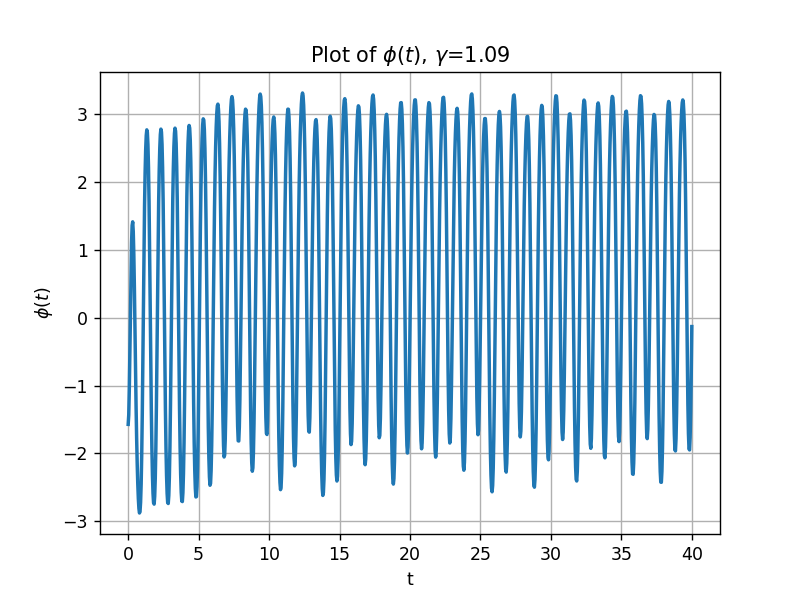

[[-0.14743768 -0.10635262 -0.19350035 -0.07530897 -0.37925869 -0.04378311
  -0.91814904 -0.41743936 -0.05045085 -0.78759142 -0.22760191 -0.06496393
  -0.62922292 -0.10984077 -0.21185411 -0.07041967 -0.48045159 -0.06118708
  -0.67950923 -0.13743039 -0.12972016]
 [18.32588197 18.09327895 18.52921353 17.75425905 19.02445481 17.1912846
  18.68439244 19.03618974 17.27130758 18.94041122 18.67325975 17.45381015
  19.07771278 18.07728706 18.5954196  17.65209957 19.11448616 17.39997999
  19.05257762 18.2686272  18.20976844]]


In [53]:
# Is this motion periodic?

plt.plot(t_span, phi_values[0], linewidth=2)
plt.xlabel('t')
plt.ylabel('$\phi(t)$')
plt.title('Plot of $\phi(t)$, $\gamma$=%0.2f'%gamma)
plt.grid(True)
plt.show()

t_values = np.array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
phi_t_values = solution.sol(t_values)

print(phi_t_values)


# No, it isn't. Would we say that it is "chaotic"?

<IPython.core.display.Javascript object>


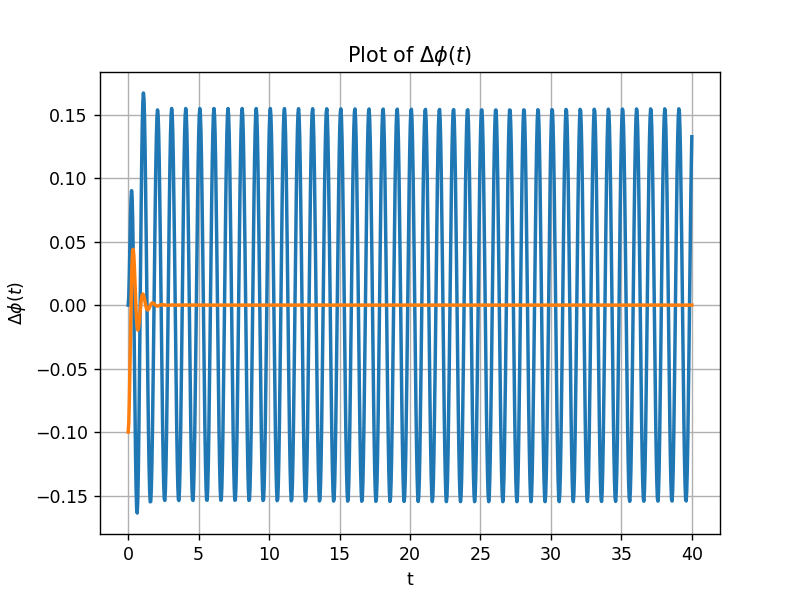

In [72]:
# Quantifying chaos


gamma = 0.1

# Case 1: Phi[0] = 0, Phi'[0] = 0
initial_conditions1 = [0, 0]
solution1 = spi.solve_ivp(equation, [0, t_max], initial_conditions1, args=(gamma, omega), dense_output=True)
t_span1 = np.linspace(0, t_max, 1000)
phi_values1 = solution1.sol(t_span1)

# fig,ax=plt.subplot
plt.plot(t_span1, phi_values1[0], linewidth=2)
plt.xlabel('t')
plt.ylabel('$\phi(t)$')
plt.title('Plot of $\phi(t)$ for $\phi[0] =$%0.2f, $\dot{\phi}[0]=$%0.2f'%(initial_conditions1[0],initial_conditions1[1]))
plt.grid(True)
plt.show()

# Go back to an "almost linear" case. Look at a small change in initial conditions

In [73]:
# Different IC's: How do the solutions differ?

# def equation(t, phi, gamma, omega):
#     phi_1 = phi[0]
#     phi_2 = phi[1]
#     return [phi_2, -2 * beta * phi_2 - omega_0**2 * np.sin(phi_1) + gamma * omega_0**2 * np.cos(omega * t)]

# beta = omega_0 / 4
# omega_0 = 1.5 * omega
# omega = 2 * np.pi

# t_max = 40

# gamma = 0.1

# Case 1: Phi[0] = 0, Phi'[0] = 0
initial_conditions1 = [0, 0]
solution1 = spi.solve_ivp(equation, [0, t_max], initial_conditions1, args=(gamma, omega), dense_output=True)
t_span1 = np.linspace(0, t_max, 1000)
phi_values1 = solution1.sol(t_span1)

# Case 2: Phi[0] = 0.1, Phi'[0] = 0
initial_conditions2 = [0.1, 0]
solution2 = spi.solve_ivp(equation, [0, t_max], initial_conditions2, args=(gamma, omega), dense_output=True)
t_span2 = np.linspace(0, t_max, 1000)
phi_values2 = solution2.sol(t_span2)

delta_phi = phi_values1[0] - phi_values2[0]

# fig,ax = plt.subplots()
plt.plot(t_span1, delta_phi, linewidth=2)
plt.xlabel('t')
plt.ylabel('$\Delta\phi(t)$')
plt.title('Plot of $\Delta\phi(t)$')
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>


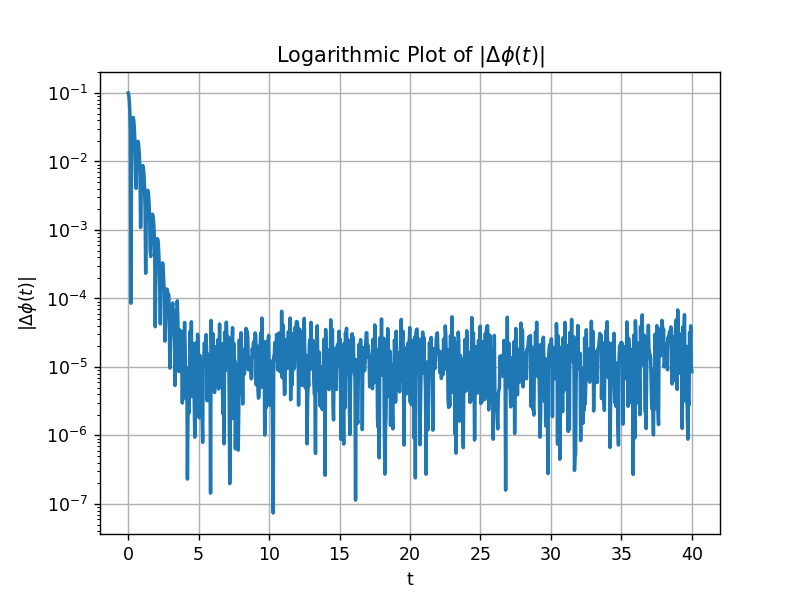

In [91]:
# A better way to plot the difference

def equation(t, phi, gamma, omega):
    phi_1 = phi[0]
    phi_2 = phi[1]
    return [phi_2, -2 * beta * phi_2 - omega_0**2 * np.sin(phi_1) + gamma * omega_0**2 * np.cos(omega * t)]

omega = 2 * np.pi
omega_0 = 1.5 * omega
beta = omega_0 / 4


t_max = 40

gamma = 0.1


# Case 1: Phi[0] = 0, Phi'[0] = 0
initial_conditions1 = [0, 0]
solution1 = spi.solve_ivp(equation, [0, t_max], initial_conditions1, args=(gamma, omega), dense_output=True)
t_span1 = np.linspace(0, t_max, 1000)
phi_values1 = solution1.sol(t_span1)

# Case 2: Phi[0] = 0.1, Phi'[0] = 0
initial_conditions2 = [0.1, 0]
solution2 = spi.solve_ivp(equation, [0, t_max], initial_conditions2, args=(gamma, omega), dense_output=True)
t_span2 = np.linspace(0, t_max, 1000)
phi_values2 = solution2.sol(t_span2)

delta_phi = phi_values1[0] - phi_values2[0]

fig,ax = plt.subplots()

plt.semilogy(t_span1, np.abs(delta_phi), linewidth=2)
plt.xlabel('t')
plt.ylabel('$|\Delta\phi(t)|$')
plt.title('Logarithmic Plot of $|\Delta\phi(t)|$')
plt.grid(True)
plt.show()

# We are hitting the limit of the precision here. Restrict the range for now. (Replot above for [0,5] instead.)

<IPython.core.display.Javascript object>


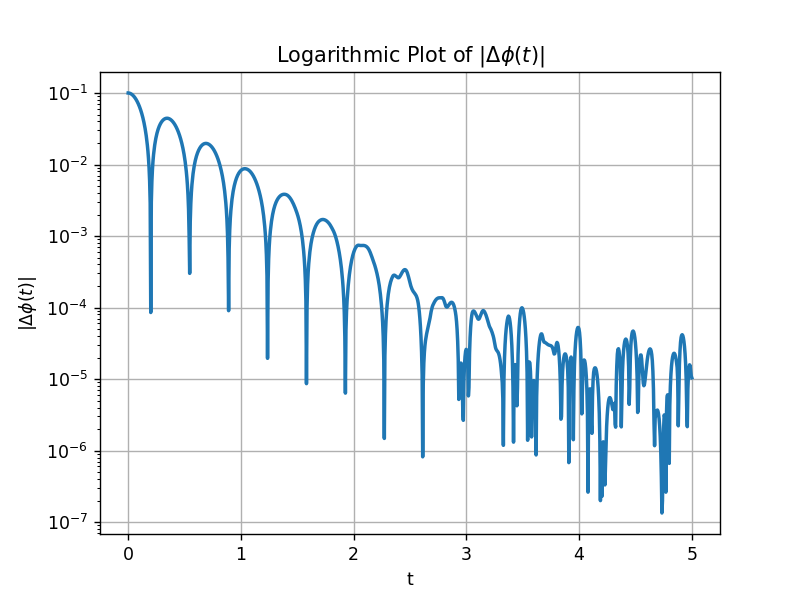

In [92]:
# We understand what's going on here
# A better way to plot the difference

def equation(t, phi, gamma, omega):
    phi_1 = phi[0]
    phi_2 = phi[1]
    return [phi_2, -2 * beta * phi_2 - omega_0**2 * np.sin(phi_1) + gamma * omega_0**2 * np.cos(omega * t)]

omega = 2 * np.pi
omega_0 = 1.5 * omega
beta = omega_0 / 4


t_max = 5

gamma = 0.1


# Case 1: Phi[0] = 0, Phi'[0] = 0
initial_conditions1 = [0, 0]
solution1 = spi.solve_ivp(equation, [0, t_max], initial_conditions1, args=(gamma, omega), dense_output=True)
t_span1 = np.linspace(0, t_max, 1000)
phi_values1 = solution1.sol(t_span1)

# Case 2: Phi[0] = 0.1, Phi'[0] = 0
initial_conditions2 = [0.1, 0]
solution2 = spi.solve_ivp(equation, [0, t_max], initial_conditions2, args=(gamma, omega), dense_output=True)
t_span2 = np.linspace(0, t_max, 1000)
phi_values2 = solution2.sol(t_span2)

delta_phi = phi_values1[0] - phi_values2[0]

fig,ax = plt.subplots()

plt.semilogy(t_span1, np.abs(delta_phi), linewidth=2)
plt.xlabel('t')
plt.ylabel('$|\Delta\phi(t)|$')
plt.title('Logarithmic Plot of $|\Delta\phi(t)|$')
plt.grid(True)
plt.show()

# We know that for a linear system, 
# the transients die away with a time constant 1/beta. We just see the same thing happening here.

<IPython.core.display.Javascript object>


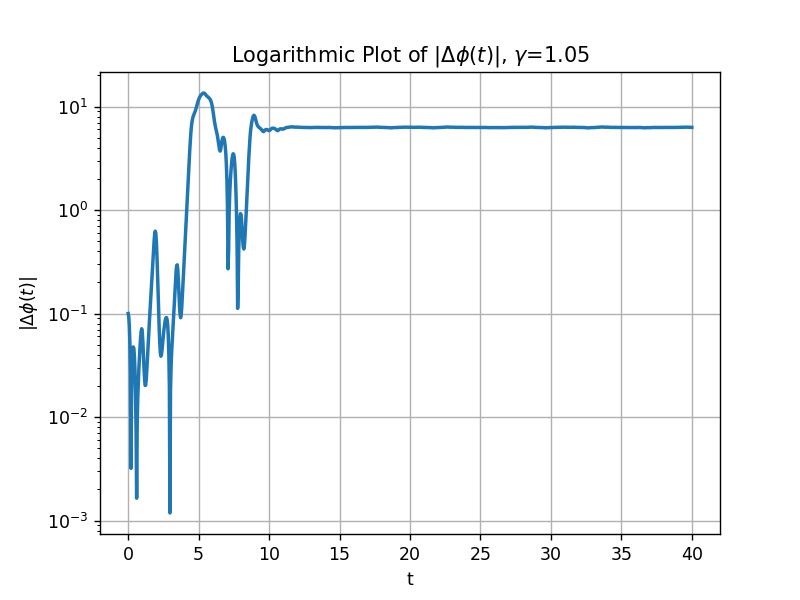

In [93]:
# Now try gamma=F0/mg=1.05

def equation(t, phi, gamma, omega):
    phi_1 = phi[0]
    phi_2 = phi[1]
    return [phi_2, -2 * beta * phi_2 - omega_0**2 * np.sin(phi_1) + gamma * omega_0**2 * np.cos(omega * t)]

omega = 2 * np.pi
omega_0 = 1.5 * omega
beta = omega_0 / 4


t_max = 40

gamma = 1.05


# Case 1: Phi[0] = 0, Phi'[0] = 0
initial_conditions1 = [0, 0]
solution1 = spi.solve_ivp(equation, [0, t_max], initial_conditions1, args=(gamma, omega), dense_output=True)
t_span1 = np.linspace(0, t_max, 1000)
phi_values1 = solution1.sol(t_span1)

# Case 2: Phi[0] = 0.1, Phi'[0] = 0
initial_conditions2 = [0.1, 0]
solution2 = spi.solve_ivp(equation, [0, t_max], initial_conditions2, args=(gamma, omega), dense_output=True)
t_span2 = np.linspace(0, t_max, 1000)
phi_values2 = solution2.sol(t_span2)

delta_phi = phi_values1[0] - phi_values2[0]

fig,ax = plt.subplots()


plt.semilogy(t_span1, np.abs(delta_phi), linewidth=2)
plt.xlabel('t')
plt.ylabel('$|\Delta\phi(t)|$')
plt.title('Logarithmic Plot of $|\Delta\phi(t)|$, $\gamma$=%0.2f'%gamma)
plt.grid(True)
plt.show()

# This is a smaller gamma than where we saw the onset of period doubling.



<IPython.core.display.Javascript object>


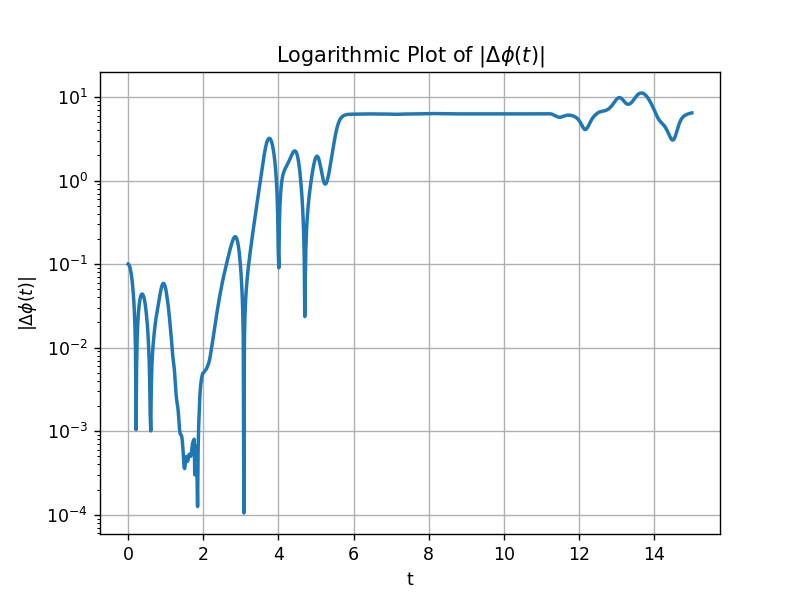

In [94]:
# Plot the difference

t_max = 15

gamma = 1.05

# Case 1: Phi[0] = 0.2, Phi'[0] = 0
initial_conditions1 = [0.2, 0]
solution1 = spi.solve_ivp(equation, [0, t_max], initial_conditions1, args=(gamma, omega), dense_output=True)
t_span1 = np.linspace(0, t_max, 1000)
phi_values1 = solution1.sol(t_span1)

# Case 2: Phi[0] = 0.3, Phi'[0] = 0
initial_conditions2 = [0.3, 0]
solution2 = spi.solve_ivp(equation, [0, t_max], initial_conditions2, args=(gamma, omega), dense_output=True)
t_span2 = np.linspace(0, t_max, 1000)
phi_values2 = solution2.sol(t_span2)

delta_phi = phi_values1[0] - phi_values2[0]

fig,ax = plt.subplots()

plt.semilogy(t_span1, np.abs(delta_phi), linewidth=2)
plt.xlabel('t')
plt.ylabel('$|\Delta\phi(t)|$')
plt.title('Logarithmic Plot of $|\Delta\phi(t)|$')
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>


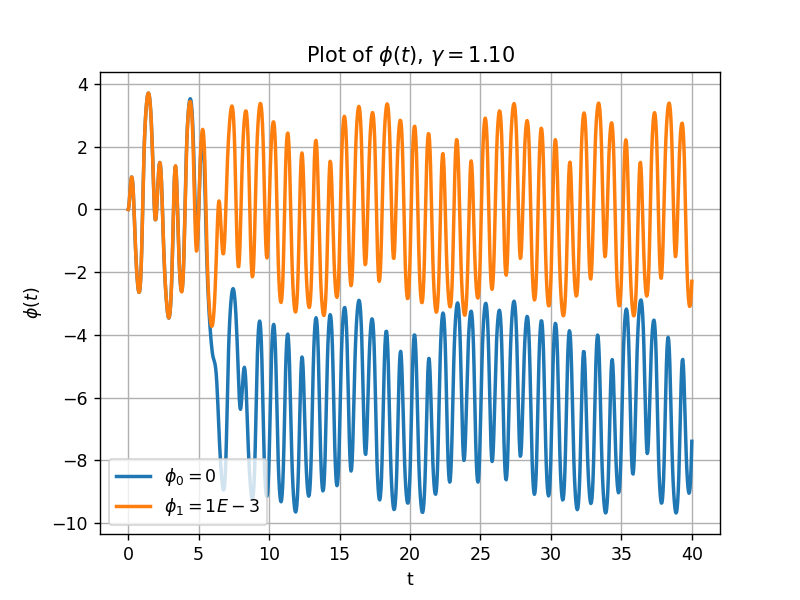

In [96]:
# Now go into the "chaotic" region
## First plot the Phi(t). Note how tiny is the difference in initial conditions.

def equation(t, phi, gamma, omega):
    phi_1 = phi[0]
    phi_2 = phi[1]
    return [phi_2, -2 * beta * phi_2 - omega_0**2 * np.sin(phi_1) + gamma * omega_0**2 * np.cos(omega * t)]

beta = omega_0 / 4
omega_0 = 1.5 * omega
omega = 2 * np.pi

t_max = 40

gamma = 1.105

fig,ax=plt.subplots()

# Case 1: Phi[0] = 0, Phi'[0] = 0
initial_conditions1 = [0, 0]
solution1 = spi.solve_ivp(equation, [0, t_max], initial_conditions1, args=(gamma, omega), dense_output=True)
t_span1 = np.linspace(0, t_max, 1000)
phi_values1 = solution1.sol(t_span1)

# Case 2: Phi[0] = 0.0001, Phi'[0] = 0
initial_conditions2 = [0.0001, 0]
solution2 = spi.solve_ivp(equation, [0, t_max], initial_conditions2, args=(gamma, omega), dense_output=True)
t_span2 = np.linspace(0, t_max, 1000)
phi_values2 = solution2.sol(t_span2)



plt.plot(t_span1, phi_values1[0], label='$\phi_0=0$', linewidth=2)
plt.plot(t_span2, phi_values2[0], label='$\phi_1=1E-3$', linewidth=2)
plt.xlabel('t')
plt.ylabel('$\phi(t)$')
plt.title('Plot of $\phi(t)$, $\gamma=$%0.2f'%gamma)
plt.legend()
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>


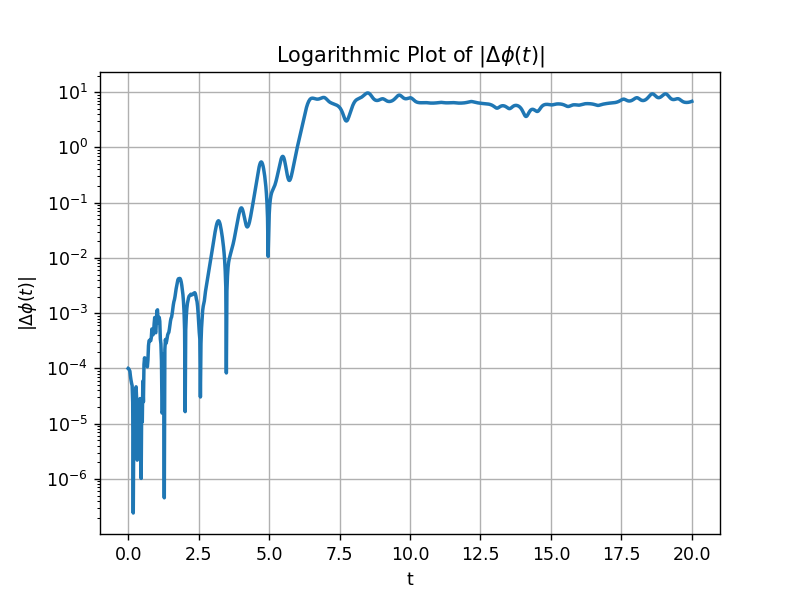

In [97]:
# Plot the difference

t_max = 20

gamma = 1.105

# Case 1: Phi[0] = 0, Phi'[0] = 0
initial_conditions1 = [0, 0]
solution1 = spi.solve_ivp(equation, [0, t_max], initial_conditions1, args=(gamma, omega), dense_output=True)
t_span1 = np.linspace(0, t_max, 1000)
phi_values1 = solution1.sol(t_span1)

# Case 2: Phi[0] = 0.0001, Phi'[0] = 0
initial_conditions2 = [0.0001, 0]
solution2 = spi.solve_ivp(equation, [0, t_max], initial_conditions2, args=(gamma, omega), dense_output=True)
t_span2 = np.linspace(0, t_max, 1000)
phi_values2 = solution2.sol(t_span2)

delta_phi = phi_values1[0] - phi_values2[0]


fig,ax = plt.subplots()


plt.semilogy(t_span1, np.abs(delta_phi), linewidth=2)
plt.xlabel('t')
plt.ylabel('$|\Delta\phi(t)|$')
plt.title('Logarithmic Plot of $|\Delta\phi(t)|$')
plt.grid(True)
plt.show()

# The difference grows exponentially. (Remember that Phi is cyclical.) 
# You can't get more sensitive to the initial conditions. 
# This is "chaos". The rate of exponential growth in the difference curve is called a Liapunov exponent.